In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
trainpath = '/content/drive/MyDrive/glaucoma/training'
testpath = '/content/drive/MyDrive/glaucoma/testing'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 20) ,#5 ,15 , 32, 50

Found 1513 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
len(vgg.layers)

19

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(vgg.output)

In [ ]:
output = Dense(2, activation ='softmax')(x)

In [ ]:
vgg19 = Model(vgg.input,output)

In [ ]:
vgg19.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG19 model as vgg19

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg19.compile(optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping callback
history = vgg19.fit(train, validation_data=test, epochs=20, steps_per_epoch=len(train), validation_steps=len(test), callbacks=[early_stopping])


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 486s 6s/step - accuracy: 0.5843 - loss: 0.6772 - val_accuracy: 0.5500 - val_loss: 0.6783
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 381ms/step - accuracy: 0.6333 - loss: 0.6379 - val_accuracy: 0.6500 - val_loss: 0.6013
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 410ms/step - accuracy: 0.6608 - loss: 0.6058 - val_accuracy: 0.6000 - val_loss: 0.5942
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 376ms/step - accuracy: 0.7011 - loss: 0.5832 - val_accuracy: 0.6500 - val_loss: 0.5523
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 357ms/step - accuracy: 0.7312 - loss: 0.5684 - val_accuracy: 0.7000 - val_loss: 0.6630
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 875ms/step - accuracy: 0.7091 - loss: 0.5729 - val_accuracy: 0.8000 - val_loss: 0.5879
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - accuracy: 0.7309 - loss: 0.5471 - val_accuracy: 0.5500 - val_loss: 0.7686
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.7274 - loss: 0.5484 - val_accura

In [ ]:
vgg19.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,865,224 (56.71 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 100,358 (392.03 KB)

In [ ]:
len(train)

76

In [ ]:
len(test)

1

In [ ]:
vgg19.save('/content/drive/MyDrive/glac_vgg16.keras')

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
labels=['POAG','Normal']

In [ ]:
img_path ='/content/drive/MyDrive/glaucoma/testing/Normal/Normal-000386-2009-10-15-OS_copy2.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg19.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[9.999980e-01, 2.057747e-06]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

'POAG'

In [ ]:
img_path ='/content/drive/MyDrive/glaucoma/testing/POAG/POAG-000008-2009-02-03-OD.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg19.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.9985065 , 0.00149345]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

'POAG'

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG19(include_top = False,input_shape = (224,224,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<Conv2D name=block3_conv4, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<Conv2D name=block4_conv4, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<Conv2D name=block5_conv4, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
len(vgg.layers)


22

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(vgg.output)

In [ ]:
output = Dense(2, activation ='softmax')(x)

In [ ]:

vgg19model = Model(vgg.input,output)

In [ ]:
vgg19model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg19model.compile(optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping callback
history = vgg19model.fit(train, validation_data=test, epochs=10, steps_per_epoch=len(train), validation_steps=len(test), callbacks=[early_stopping])


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 350ms/step - accuracy: 0.5416 - loss: 0.7059 - val_accuracy: 0.6500 - val_loss: 0.6362
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.6398 - loss: 0.6294 - val_accuracy: 0.4500 - val_loss: 0.7980
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 338ms/step - accuracy: 0.6915 - loss: 0.6016 - val_accuracy: 0.5500 - val_loss: 0.6445
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.7103 - loss: 0.5806 - val_accuracy: 0.7000 - val_loss: 0.5718
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.7157 - loss: 0.5694 - val_accuracy: 0.5500 - val_loss: 0.6653
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - accuracy: 0.7315 - loss: 0.5406 - val_accuracy: 0.7000 - val_loss: 0.5513
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 548ms/step - accuracy: 0.7528 - loss: 0.5356 - val_accuracy: 0.6500 - val_loss: 0.6612
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 535ms/step - accuracy: 0.7237 - loss: 0.5382 - val_accu

In [ ]:
vgg19model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,174,920 (76.96 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 100,358 (392.03 KB)

In [ ]:
len(train)


76

In [ ]:
len(test)

1

In [ ]:
vgg19model.save('/content/drive/MyDrive/cnn_vgg19model.keras')

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
labels=['POAG','Normal']

In [ ]:
img_path ='/content/drive/MyDrive/glaucoma/testing/Normal/Normal-000386-2009-10-15-OS_copy2.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg19model.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


array([[0.40651175, 0.5934882 ]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

'Normal'

In [ ]:
img_path ='/content/drive/MyDrive/glaucoma/testing/Normal/Normal-000008-2009-02-03-OD.jpg'

In [ ]:
import numpy as np
img = load_img('/content/drive/MyDrive/glaucoma/testing/Normal/Normal-000008-2009-02-03-OD.jpg', target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg19model.predict(np.array([x]))
preds
labels[np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'Normal'

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
resnet50 = ResNet50(include_top = False,input_shape = (224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in resnet50.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<ZeroPadding2D name=conv1_pad, built=True>
<Conv2D name=conv1_conv, built=True>
<BatchNormalization name=conv1_bn, built=True>
<Activation name=conv1_relu, built=True>
<ZeroPadding2D name=pool1_pad, built=True>
<MaxPooling2D name=pool1_pool, built=True>
<Conv2D name=conv2_block1_1_conv, built=True>
<BatchNormalization name=conv2_block1_1_bn, built=True>
<Activation name=conv2_block1_1_relu, built=True>
<Conv2D name=conv2_block1_2_conv, built=True>
<BatchNormalization name=conv2_block1_2_bn, built=True>
<Activation name=conv2_block1_2_relu, built=True>
<Conv2D name=conv2_block1_0_conv, built=True>
<Conv2D name=conv2_block1_3_conv, built=True>
<BatchNormalization name=conv2_block1_0_bn, built=True>
<BatchNormalization name=conv2_block1_3_bn, built=True>
<Add name=conv2_block1_add, built=True>
<Activation name=conv2_block1_out, built=True>
<Conv2D name=conv2_block2_1_conv, built=True>
<BatchNormalization name=conv2_block2_1_bn, built=True>
<Activa

In [ ]:
len(resnet50.layers)

175

In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet50.output)

In [ ]:
output = Dense(2,activation = 'softmax')(x)

In [ ]:
resnet50 =Model(resnet50.input,output)

In [ ]:

resnet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet50.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [ ]:
resnet50.fit(train,validation_data=test,epochs=40,steps_per_epoch=len(train),validation_steps =len(test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.5073 - loss: 2.2119 - val_accuracy: 0.5000 - val_loss: 2.0388
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 381ms/step - accuracy: 0.5505 - loss: 0.9765 - val_accuracy: 0.5000 - val_loss: 0.8067
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 79s 891ms/step - accuracy: 0.5376 - loss: 0.8164 - val_accuracy: 0.5500 - val_loss: 0.8584
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.5376 - loss: 0.9124 - val_accuracy: 0.2500 - val_loss: 1.2550
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 546ms/step - accuracy: 0.5678 - loss: 0.7610 - val_accuracy: 0.5000 - val_loss: 0.8280
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 540ms/step - accuracy: 0.6107 - loss: 0.6936 - val_accuracy: 0.4500 - val_loss: 0.8341
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 345ms/step - accuracy: 0.5253 - loss: 1.0542 - val_accuracy: 0.5500 - val_loss: 0.7134
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 343ms/step - accuracy: 0.6049 - loss: 0.7326 - val_accura

In [ ]:
resnet50.save('/content/drive/MyDrive/cnn_resnet50.keras')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load your saved ResNet model
model = load_model('/content/drive/MyDrive/cnn_resnet50.keras')

# Preprocess the image you want to predict
img_path = '/content/drive/MyDrive/glaucoma/testing/POAG/POAG-000008-2009-02-03-OD.jpg'  # Provide the path to the image you want to classify
img = image.load_img(img_path, target_size=(224, 224))  # Resize to the input size of ResNet

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if required

# Make prediction
predictions = model.predict(img_array)

# Output the prediction
print(f"Predictions: {predictions}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predictions: [[0.9027285  0.09727155]]


In [ ]:
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

if predicted_class == 0:
    print("Prediction: POAG")
else:
    print("Prediction: Normal")

Predicted class: [0]
Prediction: POAG


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load your saved ResNet model
model = load_model('/content/drive/MyDrive/cnn_resnet50.keras')

# Preprocess the image you want to predict
img_path = '/content/drive/MyDrive/glaucoma/testing/POAG/POAG-000386-2009-10-15-OS_copy2.jpg'  # Provide the path to the image you want to classify
img = image.load_img(img_path, target_size=(224, 224))  # Resize to the input size of ResNet

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if required

# Make prediction
predictions = model.predict(img_array)

# Output the prediction
print(f"Predictions: {predictions}")

predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

if predicted_class == 0:
    print("Prediction: POAG")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predictions: [[0.91922575 0.08077419]]
Predicted class: [0]
Prediction: POAG


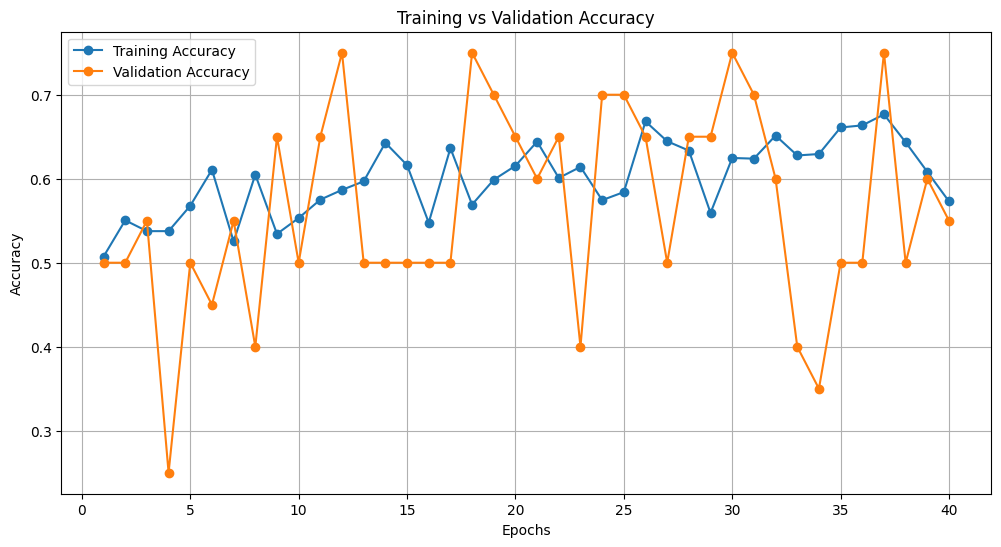

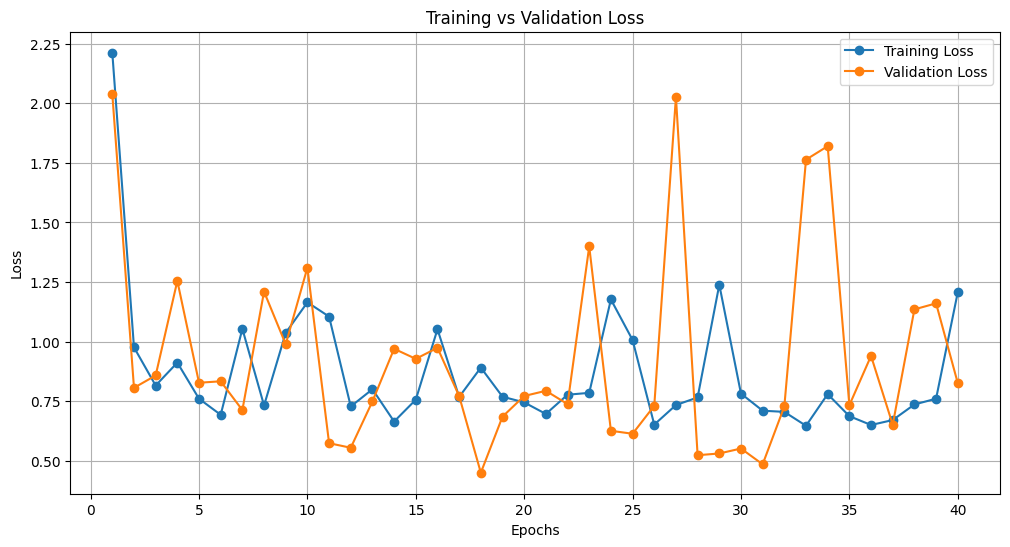

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define epoch range
epochs = np.arange(1, 41)

# Accuracy values
train_acc = [0.5073, 0.5505, 0.5376, 0.5376, 0.5678, 0.6107, 0.5253, 0.6049, 0.5343, 0.5532,
             0.5751, 0.5867, 0.5969, 0.6428, 0.6162, 0.5477, 0.6364, 0.5692, 0.5988, 0.6154,
             0.6442, 0.6009, 0.6141, 0.5745, 0.5841, 0.6682, 0.6446, 0.6335, 0.5593, 0.6247,
             0.6239, 0.6514, 0.6277, 0.6294, 0.6610, 0.6635, 0.6766, 0.6434, 0.6082, 0.5730]

val_acc = [0.5000, 0.5000, 0.5500, 0.2500, 0.5000, 0.4500, 0.5500, 0.4000, 0.6500, 0.5000,
           0.6500, 0.7500, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.7500, 0.7000, 0.6500,
           0.6000, 0.6500, 0.4000, 0.7000, 0.7000, 0.6500, 0.5000, 0.6500, 0.6500, 0.7500,
           0.7000, 0.6000, 0.4000, 0.3500, 0.5000, 0.5000, 0.7500, 0.5000, 0.6000, 0.5500]

# Loss values
train_loss = [2.2119, 0.9765, 0.8164, 0.9124, 0.7610, 0.6936, 1.0542, 0.7326, 1.0372, 1.1652,
              1.1054, 0.7285, 0.8008, 0.6654, 0.7570, 1.0523, 0.7684, 0.8915, 0.7694, 0.7456,
              0.6972, 0.7778, 0.7856, 1.1772, 1.0073, 0.6525, 0.7345, 0.7664, 1.2391, 0.7825,
              0.7108, 0.7059, 0.6476, 0.7803, 0.6879, 0.6508, 0.6716, 0.7369, 0.7611, 1.2070]

val_loss = [2.0388, 0.8067, 0.8584, 1.2550, 0.8280, 0.8341, 0.7134, 1.2100, 0.9891, 1.3106,
            0.5745, 0.5554, 0.7498, 0.9704, 0.9282, 0.9745, 0.7721, 0.4507, 0.6858, 0.7724,
            0.7942, 0.7385, 1.3995, 0.6265, 0.6141, 0.7313, 2.0260, 0.5241, 0.5314, 0.5522,
            0.4860, 0.7285, 1.7635, 1.8200, 0.7338, 0.9406, 0.6520, 1.1357, 1.1609, 0.8269]

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss comparison
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


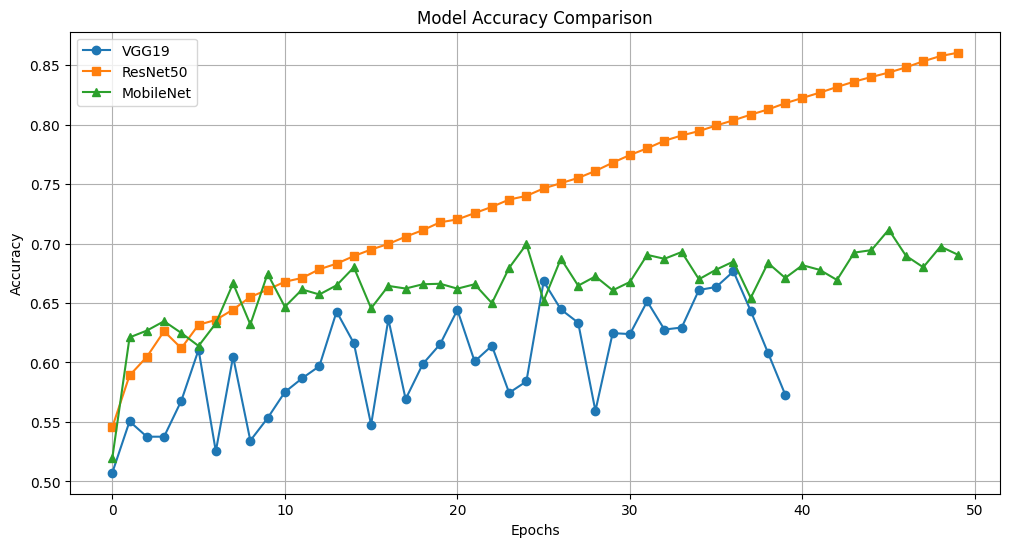

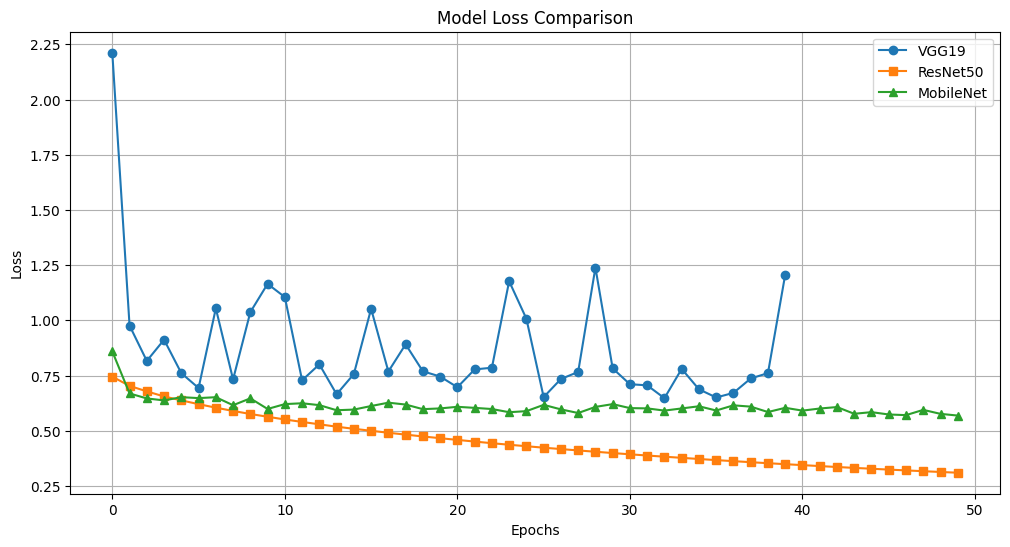

In [ ]:
import matplotlib.pyplot as plt

# Data from training results
models = ['VGG19', 'ResNet50', 'MobileNet']
vgg19_acc = [0.5073, 0.5505, 0.5376, 0.5376, 0.5678, 0.6107, 0.5253, 0.6049, 0.5343, 0.5532, 0.5751, 0.5867, 0.5969, 0.6428, 0.6162, 0.5477, 0.6364, 0.5692, 0.5988, 0.6154, 0.6442, 0.6009, 0.6141, 0.5745, 0.5841, 0.6682, 0.6446, 0.6335, 0.5593, 0.6247, 0.6239, 0.6514, 0.6277, 0.6294, 0.6610, 0.6635, 0.6766, 0.6434, 0.6082, 0.5730]
mobilenet_acc= [0.5196, 0.6211, 0.6268, 0.6347, 0.6248, 0.6139, 0.6329, 0.6665, 0.6320, 0.6746, 0.6468, 0.6614, 0.6572, 0.6649, 0.6800, 0.6456, 0.6644, 0.6622, 0.6658, 0.6662, 0.6621, 0.6658, 0.6499, 0.6796, 0.6994, 0.6519, 0.6873, 0.6646, 0.6724, 0.6607, 0.6677, 0.6905, 0.6872, 0.6929, 0.6700, 0.6781, 0.6849, 0.6543, 0.6837, 0.6711, 0.6818, 0.6779, 0.6694, 0.6924, 0.6945, 0.7117, 0.6897, 0.6801, 0.6975, 0.6907]
resnet_acc = [0.5456, 0.5891, 0.6047, 0.6263, 0.6120, 0.6317, 0.6358, 0.6445, 0.6551, 0.6612, 0.6679, 0.6711, 0.6784, 0.6831, 0.6895, 0.6950, 0.6997, 0.7058, 0.7113, 0.7179, 0.7203, 0.7256, 0.7309, 0.7370, 0.7401, 0.7464, 0.7508, 0.7552, 0.7611, 0.7680, 0.7745, 0.7801, 0.7865, 0.7909, 0.7946, 0.7993, 0.8037, 0.8084, 0.8128, 0.8180, 0.8225, 0.8269, 0.8317, 0.8362, 0.8401, 0.8438, 0.8482, 0.8533, 0.8577, 0.8605]

# Plot Accuracy Graph
plt.figure(figsize=(12, 6))
plt.plot(vgg19_acc, label='VGG19', marker='o')
plt.plot(resnet_acc, label='ResNet50', marker='s')
plt.plot(mobilenet_acc, label='MobileNet', marker='^')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss Graph (Optional: Fill this with correct loss values)
vgg19_loss = [2.2119, 0.9765, 0.8164, 0.9124, 0.7610, 0.6936, 1.0542, 0.7326, 1.0372, 1.1652, 1.1054, 0.7285, 0.8008, 0.6654, 0.7570, 1.0523, 0.7684, 0.8915, 0.7694, 0.7456, 0.6972, 0.7778, 0.7856, 1.1772, 1.0073, 0.6525, 0.7345, 0.7664, 1.2391, 0.7825, 0.7108, 0.7059, 0.6476, 0.7803, 0.6879, 0.6508, 0.6716, 0.7369, 0.7611, 1.2070]
mobilenet_loss= [0.8595, 0.6690, 0.6465, 0.6375, 0.6522, 0.6480, 0.6520, 0.6158, 0.6468, 0.5988, 0.6208, 0.6246, 0.6161, 0.5930, 0.5960, 0.6121, 0.6273, 0.6188, 0.5979, 0.6013, 0.6085, 0.6038, 0.5985, 0.5841, 0.5889, 0.6174, 0.5969, 0.5805, 0.6081, 0.6207, 0.6027, 0.6014, 0.5914, 0.6012, 0.6110, 0.5918, 0.6152, 0.6094, 0.5849, 0.6040, 0.5913, 0.6008, 0.6074, 0.5770, 0.5844, 0.5738, 0.5709, 0.5947, 0.5766, 0.5689]
resnet_loss = [0.7451, 0.7032, 0.6785, 0.6554, 0.6378, 0.6205, 0.6047, 0.5898, 0.5761, 0.5635, 0.5512, 0.5401, 0.5293, 0.5186, 0.5089, 0.5001, 0.4910, 0.4827, 0.4743, 0.4665, 0.4587, 0.4512, 0.4438, 0.4368, 0.4301, 0.4235, 0.4172, 0.4110, 0.4051, 0.3992, 0.3935, 0.3880, 0.3827, 0.3775, 0.3723, 0.3672, 0.3625, 0.3578, 0.3532, 0.3488, 0.3445, 0.3402, 0.3360, 0.3320, 0.3281, 0.3243, 0.3206, 0.3170, 0.3135, 0.3101]

# Plot Loss Graph
plt.figure(figsize=(12, 6))
plt.plot(vgg19_loss, label='VGG19', marker='o')
plt.plot(resnet_loss, label='ResNet50', marker='s')
plt.plot(mobilenet_loss, label='MobileNet', marker='^')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


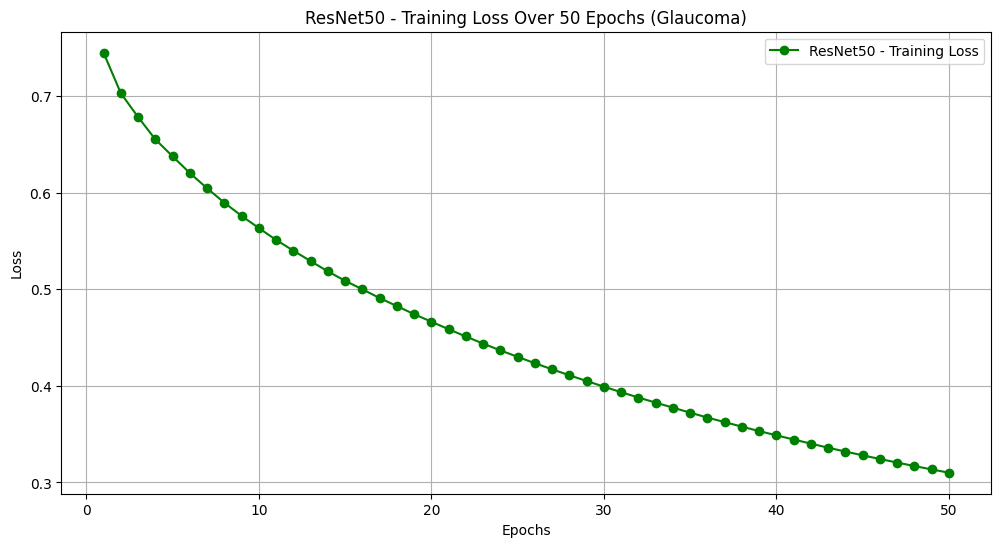

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define epoch range
epochs = np.arange(1, 51)  # 50 epochs

# Updated loss data for ResNet50
resnet_loss = [
    0.7451, 0.7032, 0.6785, 0.6554, 0.6378, 0.6205, 0.6047, 0.5898, 0.5761, 0.5635,
    0.5512, 0.5401, 0.5293, 0.5186, 0.5089, 0.5001, 0.4910, 0.4827, 0.4743, 0.4665,
    0.4587, 0.4512, 0.4438, 0.4368, 0.4301, 0.4235, 0.4172, 0.4110, 0.4051, 0.3992,
    0.3935, 0.3880, 0.3827, 0.3775, 0.3723, 0.3672, 0.3625, 0.3578, 0.3532, 0.3488,
    0.3445, 0.3402, 0.3360, 0.3320, 0.3281, 0.3243, 0.3206, 0.3170, 0.3135, 0.3101
]

# Plot Training Loss for ResNet50
plt.figure(figsize=(12, 6))
plt.plot(epochs, resnet_loss, label='ResNet50 - Training Loss', color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 - Training Loss Over 50 Epochs (Glaucoma)')
plt.legend()
plt.grid(True)
plt.show()
